In [63]:
import pandas as pd

file_path = 'movie_data.csv'
df = pd.read_csv(file_path)

# Check dataset size
dataset_size = df.shape
print(f"\nDataset Size: {dataset_size}")

# Check number of variables
num_variables = len(df.columns)
print(f"\nNumber of Variables: {num_variables}")

# Identify variables
variables = df.columns.tolist()
print("\nVariables:")
print(variables)

# Check variable types
variable_types = df.dtypes
print("\nVariable Types:")
print(variable_types)


Dataset Size: (1000, 5)

Number of Variables: 5

Variables:
['Title', 'Year', 'IMDb Rating', 'Metascore', 'Votes']

Variable Types:
Title           object
Year             int64
IMDb Rating    float64
Metascore      float64
Votes          float64
dtype: object


In [64]:
# Display the first few rows of the dataset to examine its structure
print("Dataset Overview:")
print(df.head())


Dataset Overview:
                        Title  Year  IMDb Rating  Metascore  Votes
0                       可怜的东西  2023          8.4       87.0    NaN
1  Killers of the Flower Moon  2023          7.7       89.0    NaN
2     La sociedad de la nieve  2023          7.9       72.0    NaN
3                 Oppenheimer  2023          8.4       89.0    NaN
4               The Holdovers  2023          8.0       82.0    NaN


In [65]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Remove the 'Votes' column
df = df.drop(columns=['Votes'])

# Fill missing Metascore values with the average Metascore of other movies in the same year
df['Metascore'] = df.groupby('Year')['Metascore'].transform(lambda x: x.fillna(x.mean()))

# Check for missing values after handling
missing_values_after_handling = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after_handling)

# Drop rows with any remaining missing values
df = df.dropna()

# Check for missing values after handling
missing_values_after_removal = df.isnull().sum()
print("\nMissing Values After Removal:")
print(missing_values_after_removal)

Missing Values:
Title             0
Year              0
IMDb Rating       0
Metascore       156
Votes          1000
dtype: int64

Missing Values After Handling:
Title          0
Year           0
IMDb Rating    0
Metascore      6
dtype: int64

Missing Values After Removal:
Title          0
Year           0
IMDb Rating    0
Metascore      0
dtype: int64


IMDb Rating Summary Statistics:
count    994.000000
mean       7.971730
std        0.276388
min        7.600000
25%        7.800000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDb Rating, dtype: float64

Metascore Summary Statistics:
count    994.000000
mean      79.343518
std       11.332326
min       28.000000
25%       73.000000
50%       79.306548
75%       87.393750
max      100.000000
Name: Metascore, dtype: float64


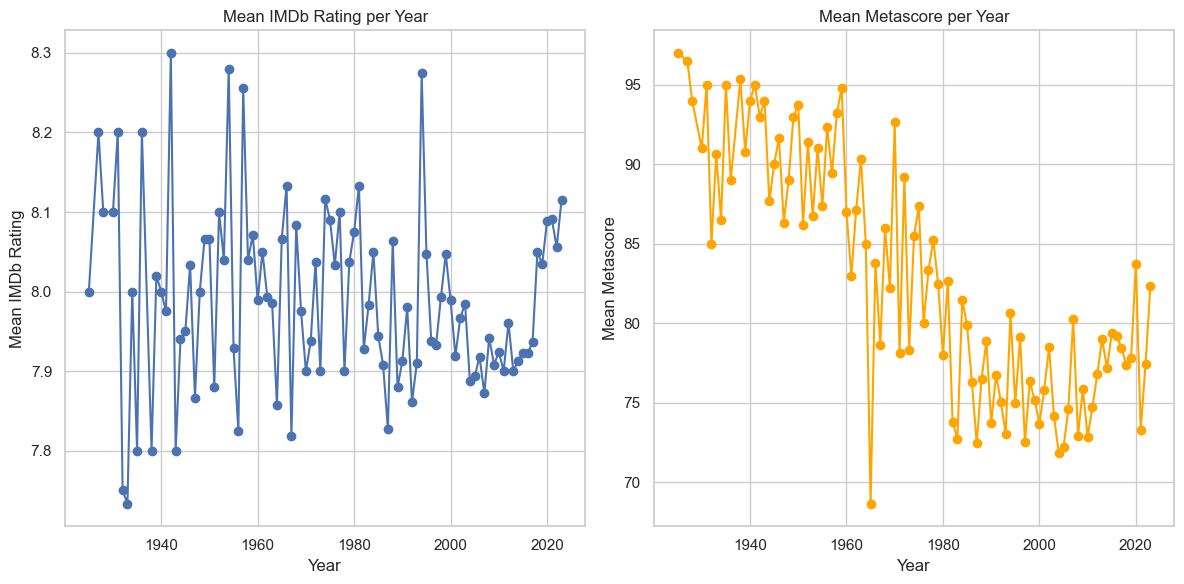

In [66]:
import matplotlib.pyplot as plt

# Calculate summary statistics for IMDb Rating
imdb_summary = df['IMDb Rating'].describe()

# Calculate summary statistics for Metascore
metascore_summary = df['Metascore'].describe()

# Print summary statistics
print("IMDb Rating Summary Statistics:")
print(imdb_summary)
print("\nMetascore Summary Statistics:")
print(metascore_summary)

# Calculate mean IMDb Rating and Metascore per year
mean_imdb_per_year = df.groupby('Year')['IMDb Rating'].mean()
mean_metascore_per_year = df.groupby('Year')['Metascore'].mean()

# Plot mean IMDb Rating per year
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_imdb_per_year, marker='o')
plt.title('Mean IMDb Rating per Year')
plt.xlabel('Year')
plt.ylabel('Mean IMDb Rating')

# Plot mean Metascore per year
plt.subplot(1, 2, 2)
plt.plot(mean_metascore_per_year, marker='o', color='orange')
plt.title('Mean Metascore per Year')
plt.xlabel('Year')
plt.ylabel('Mean Metascore')

plt.tight_layout()
plt.show()


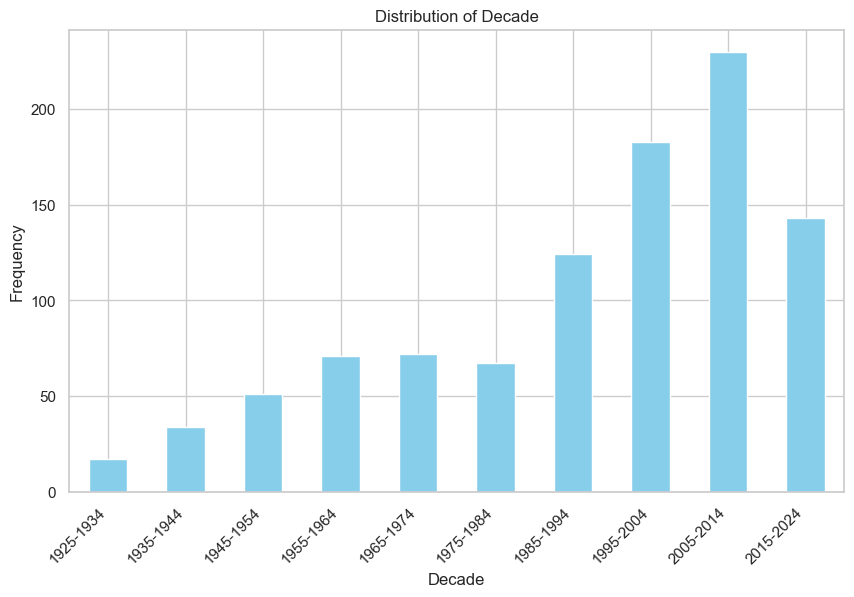

In [67]:
# Group the years into decades
df['Decade'] = pd.cut(df['Year'], bins=range(df['Year'].min(), df['Year'].max() + 11, 10),
                      labels=[f'{decade}-{decade+9}' for decade in range(df['Year'].min(), df['Year'].max() + 1, 10)])

# Convert 'Year' to a categorical variable
df['Year'] = df['Year'].astype('category')

# Specify the name of the categorical variable for distribution analysis (e.g., 'Decade')
categorical_variable = 'Decade'

# Create a frequency table
frequency_table = df[categorical_variable].value_counts()

# Visualization - Bar chart
plt.figure(figsize=(10, 6))
frequency_table.sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Distribution of {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [68]:
# Identify outliers in IMDb Rating and Metascore
imdb_outliers = df['IMDb Rating'].quantile([0.25, 0.75]).values
metascore_outliers = df['Metascore'].quantile([0.25, 0.75]).values

# Calculate the Interquartile Range (IQR) for IMDb Rating and Metascore
imdb_iqr = imdb_outliers[1] - imdb_outliers[0]
metascore_iqr = metascore_outliers[1] - metascore_outliers[0]

# Define the lower and upper bounds for identifying outliers
imdb_lower_bound = imdb_outliers[0] - 1.5 * imdb_iqr
imdb_upper_bound = imdb_outliers[1] + 1.5 * imdb_iqr

metascore_lower_bound = metascore_outliers[0] - 1.5 * metascore_iqr
metascore_upper_bound = metascore_outliers[1] + 1.5 * metascore_iqr

# Identify outliers in IMDb Rating and Metascore
imdb_outliers = df[(df['IMDb Rating'] < imdb_lower_bound) | (df['IMDb Rating'] > imdb_upper_bound)]
metascore_outliers = df[(df['Metascore'] < metascore_lower_bound) | (df['Metascore'] > metascore_upper_bound)]

# Print the identified outliers
print("IMDb Rating Outliers:")
print(imdb_outliers)

print("\nMetascore Outliers:")
print(metascore_outliers)

IMDb Rating Outliers:
                                     Title  Year  IMDb Rating   Metascore  \
5                                12th Fail  2023          9.2   82.333333   
13     Spider-Man: Across the Spider-Verse  2023          8.6   86.000000   
14                                   인터스텔라  2014          8.7   74.000000   
15                                  쇼생크 탈출  1994          9.3   82.000000   
18                                  Daeboo  1972          9.2  100.000000   
24                                  다크 나이트  2008          9.0   84.000000   
25                          반지의 제왕: 반지 원정대  2001          8.9   92.000000   
27                         뻐꾸기 둥지 위로 날아간 새  1975          8.7   84.000000   
28                                   펄프 픽션  1994          8.9   95.000000   
30                                     인셉션  2010          8.8   74.000000   
33                                  파이트 클럽  1999          8.8   67.000000   
42                                  양들의 침묵  1991      

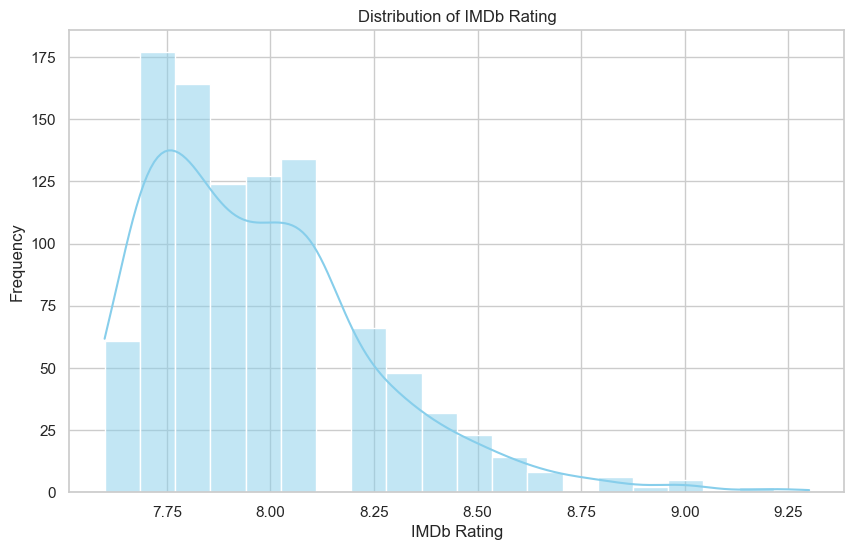

In [69]:
import seaborn as sns

# IMDb Rating ( target variable )
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

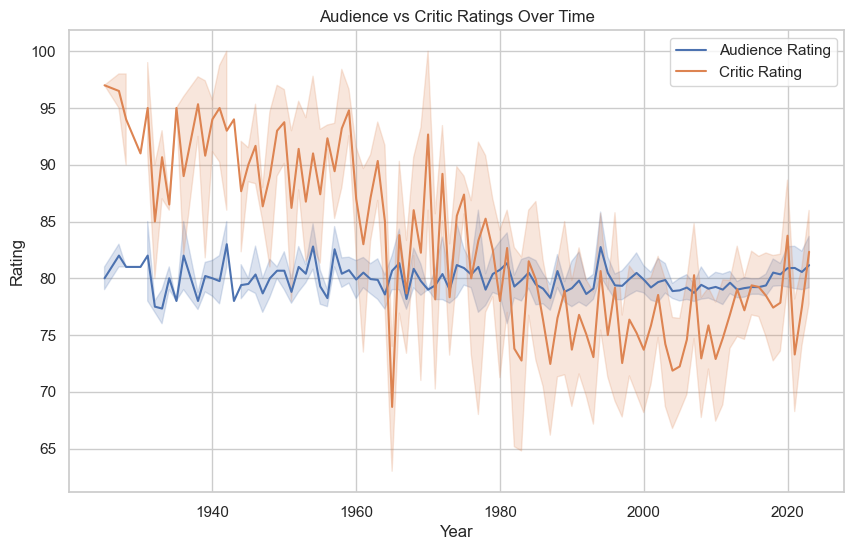

In [70]:
# Multiply IMDb Rating by 10
df['IMDb Rating'] *= 10

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot audience ratings (IMDb Rating) over time
sns.lineplot(x='Year', y='IMDb Rating', data=df, label='Audience Rating', ax=ax)

# Plot critic ratings (Metascore) over time
sns.lineplot(x='Year', y='Metascore', data=df, label='Critic Rating', ax=ax)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Audience vs Critic Ratings Over Time')

# Show legend
plt.legend()

# Show the plot
plt.show()

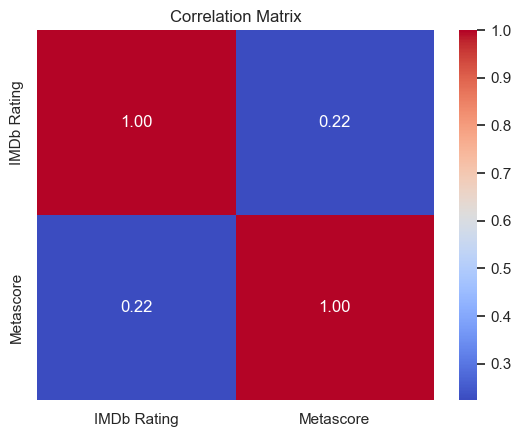

In [71]:
# Create a correlation matrix
correlation_matrix = df[['IMDb Rating', 'Metascore']].corr()

# Plot a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\somi4\AppData\Local\Temp\ipykernel_5172\1698581658.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Year').agg({'IMDb Rating': 'mean', 'Metascore': 'mean'}).reset_index()


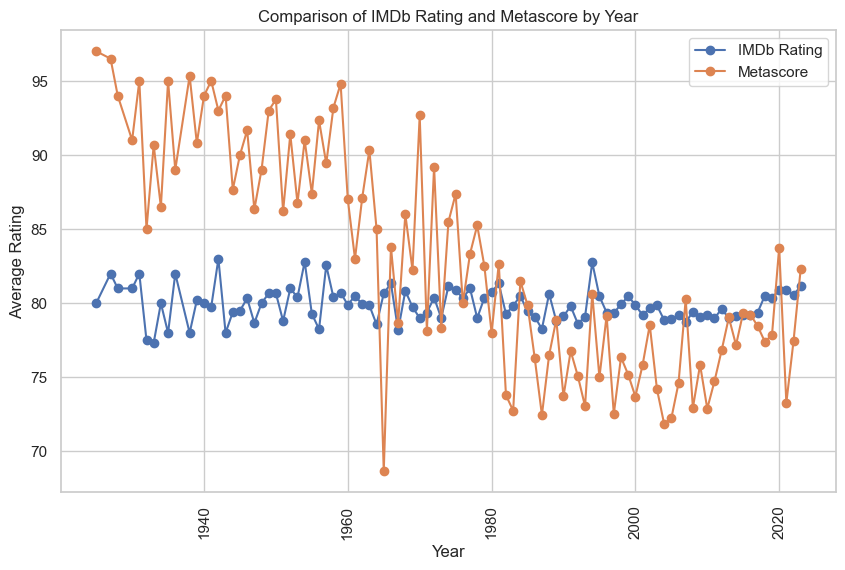

In [74]:
# Group by Year and calculate the mean of IMDb Rating and Metascore for each year
grouped_data = df.groupby('Year').agg({'IMDb Rating': 'mean', 'Metascore': 'mean'}).reset_index()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['IMDb Rating'], label='IMDb Rating', marker='o')
plt.plot(grouped_data['Year'], grouped_data['Metascore'], label='Metascore', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Comparison of IMDb Rating and Metascore by Year')
plt.legend()
plt.xticks(rotation=90)
plt.show()

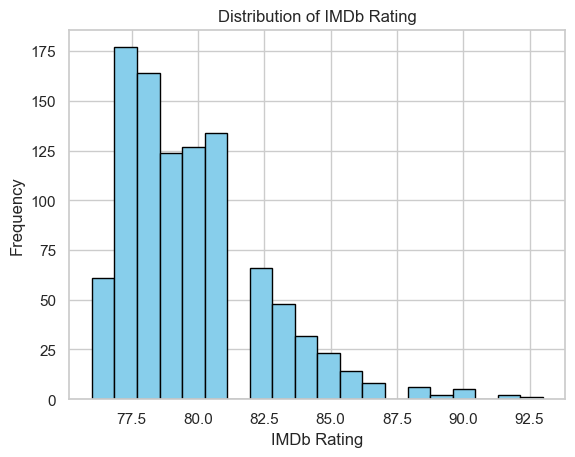

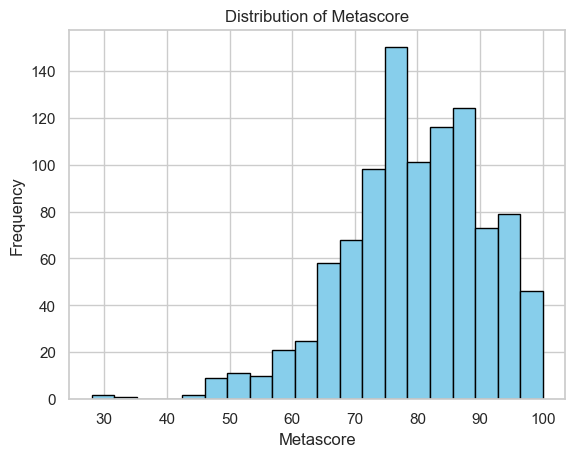

In [76]:
import matplotlib.pyplot as plt

# IMDb Rating histogram
plt.hist(df['IMDb Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Metascore histogram
plt.hist(df['Metascore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

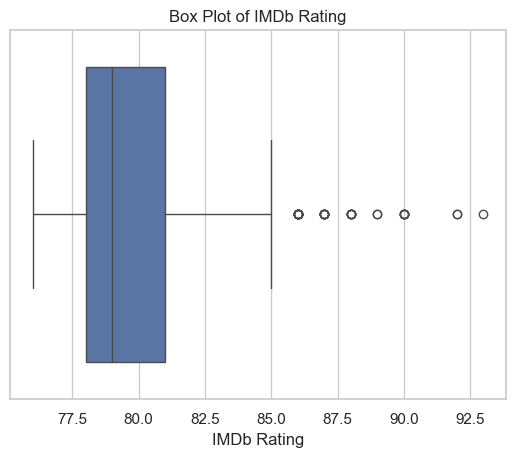

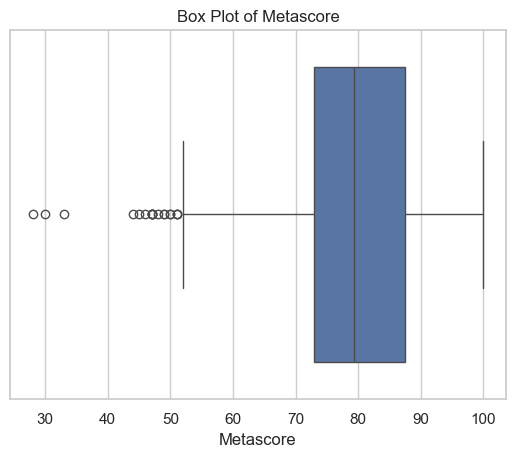

In [77]:
# IMDb Rating Box Plot
sns.boxplot(x=df['IMDb Rating'])
plt.title('Box Plot of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.show()

# Metascore Box Plot
sns.boxplot(x=df['Metascore'])
plt.title('Box Plot of Metascore')
plt.xlabel('Metascore')
plt.show()

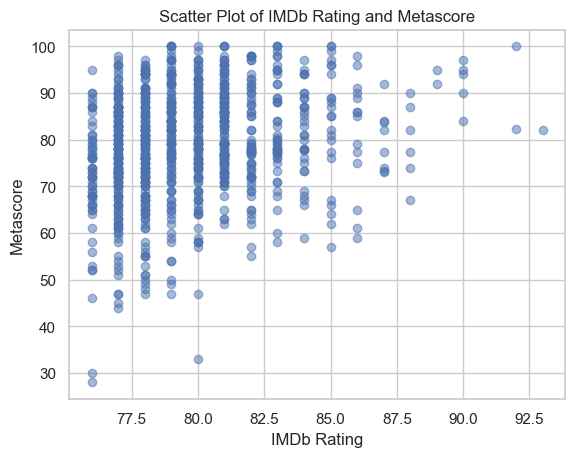

In [78]:
# IMDb Rating, Metascore scatter plot
plt.scatter(df['IMDb Rating'], df['Metascore'], alpha=0.5)
plt.title('Scatter Plot of IMDb Rating and Metascore')
plt.xlabel('IMDb Rating')
plt.ylabel('Metascore')
plt.show()
